## Why am I writing this?

Well I was revising concepts in Machine Learning. And if you have ever done so yourself, you might agree it won't go without taking a dive into PCA, why  is it, what is it and how is it used. 

### Let's first talk about Why PCA?

Consider a rock band that is made up of 20 members. That's too many members for a band isn't it. Maybe yes, maybe no. Let's say the band has 3 guitarists, couple of vocalists, one on piano, one on an electronic keyboard, some have flute etc. The band size might work okay depending on the venue like Madison-square or Wembley. But what if the only available venues for this band are coffee shops. Well in that case, 20 members just might seem too many. What seems appropriate for the coffee shops is having like 1 vocalist, 1 on drums, 1 on guitar and may be 1 can play keyboard. You might not get all the intricate details of a song but it just might be good enough for the Coffee shop to listen to in an almos MTV Unplugged kind od music. 

This is exactly the purpose of PCA (Principal Component Analysis) where the band members are the variables representing the data and the song is what the data is representing.

#### With PCA, we are trying to find an alternate representation of data with lesser number of variables such that we are able to capture maximum variance in the data.


### What is PCA?

PCA reduces the dimensionality of input by combining the input variable in such a way that it maximizes variance. Essentially, it is looking to project inputs along an axis maximizing variance. Okay, I've mentioned this multiple times now that we are looking to maximize variance but what does that mean. In simple terms, we are looking to capture most information with lesser variable. Before diving deeper, it is important to have the inputs scaled, and by scaling I mean to subract mean from the input and dividing by standard deviation. As we follow on the math, it would start making sense why that is important. 

So let get into this now.
Consider X be the input matrix of n samples and m variables (nxm). 
We are looking to find a representation of the inputs t such that 

max var(t), S.T (Wtrans)xW = 1

where t = $\sum$ XW  over all samples

X = input matrix
W = weight vector
t = scores vector (this will provide scores to each of the variables in the input)

max $\sum$ ((t - tmean)(t-tmean))/(n-1)

Now since, we have scaled the data so the t has 0 mean and unit variance, this expression just reduces to

max t.t

using the definition of t we have

max (Wtrans.X)(Xtrans.W)

S.T WtransW = 1

We have something golden here. Let's see what is it and how. We can apply Lagrange's multiplier here to get this into an optimization problem to solve.

L = F - pG
p = Lagrange multipler
G = WtransW

We want to maximize

L = (Wtrans.Xtrans)(X.W) - p(WtransW)

dL/dW = 0 and dL/dX = 0

dL/dW = XtransXW - pW = 0

dL/dX = WtransW = 0


This gives us,

(XtransX)W = pW ....we found something golden!!!

This essentially reduces to the Eigenvalue problem. If you are not aware of Eigen values and Eigen vectors, If I have to simply put for a matrix A that is invertible and eigen vector v with the eigen value p relates,
Av = pv

Since we autoscaled our data, XtransX is simply the covariance matrix of X, which has two good properties 
1. It is symmetric
2. It is positive definite

Solving for eigen value, the largest eigen value gives us the optimal weight for a single principle component. This naturally extends to multiple principle components so as to why stop at the largest eigen value, and we can go on to have k number of principle components in that manner.







## Okay, now let's get down to applying this principle of PCA

Here we are looking to create an S&P Index Fund

In [2]:
# import module to pull stock data from yahoo finance
!pip install yfinance
import yfinance as yf

import pandas as pd
import numpy as np

In [11]:
# define function to get list of S&P 500 names
def getSP500():
    # get table of S&P 500 stocks
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    
    # get dataframe
    df_sp500 = table[0]

    # get string of ticker names
    ticker_names = str(df_sp500['Symbol'].to_list()).replace("'", "").replace("[", "").replace("]", "").replace(",", "")#.replace("BRK.B", "").replace("BF.B", "").replace("LUMN", "")

    return ticker_names

ticker_names = getSP500()
print(ticker_names,type(ticker_names))


MMM ABT ABBV ABMD ACN ATVI ADBE AMD AAP AES AFL A APD AKAM ALK ALB ARE ALXN ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH ADI ANSS ANTM AON AOS APA AAPL AMAT APTV ADM ANET AJG AIZ T ATO ADSK ADP AZO AVB AVY BKR BLL BAC BK BAX BDX BRK.B BBY BIO BIIB BLK BA BKNG BWA BXP BSX BMY AVGO BR BF.B CHRW COG CDNS CZR CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE CNC CNP CERN CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CTXS CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ COO CPRT GLW CTVA COST CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DISCA DISCK DISH DG DLTR D DPZ DOV DOW DTE DUK DRE DD DXC EMN ETN EBAY ECL EIX EW EA EMR ENPH ETR EOG EFX EQIX EQR ESS EL ETSY EVRG ES RE EXC EXPE EXPD EXR XOM FFIV FB FAST FRT FDX FIS FITB FE FRC FISV FLT FMC F FTNT FTV FBHS FOXA FOX BEN FCX GPS GRMN IT GNRC GD GE GIS GM GPC GILD GL GPN GS GWW HAL HBI HIG HAS HCA PEAK HSIC HSY HES HPE HLT HOLX HD HON HRL HST HWM HPQ HUM HBAN HII IE

In [10]:
# pull historical data
data = yf.download(ticker_names, start="2020-01-01", end="2021-01-01")

[*********************100%***********************]  505 of 505 completed

3 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- OGN: Data doesn't exist for startDate = 1577858400, endDate = 1609480800
- BF.B: No data found for this date range, symbol may be delisted


In [17]:
data.head()

Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2020-01-02  85.128845  28.982893  157.171890  74.207466  82.864151  82.938141   
2020-01-03  83.762024  27.548195  157.181747  73.486023  82.077606  81.895088   
2020-01-06  84.009636  27.219410  154.598541  74.071579  82.725349  83.094116   
2020-01-07  84.267151  27.119778  152.764648  73.723213  82.253426  82.499466   
2020-01-08  85.099129  27.737495  151.009644  74.909149  82.836395  83.298828   

                                                           ...   Volume  \
                  ABMD        ABT         ACN        ADBE  ...      XEL   
Date                                                       ...            
2020-01-02  168.809998  84.945091  205.489380  334.429993  ...  2915400   
2020-01-03  166.820007  83.909538  205.147125  331.809998  ...  2422500   
2020-01-06  179.039993  84.349159  203.807526  333.709991  ...  2217100   
2020-01-07  180.350006  83.880226  199.407318  333.390015  ...  1861100   
2020-01-08  178.690002  84.222160  199.798477  337.869995  ...  4828900   

                                                                           \
               XLNX       XOM     XRAY      XYL      YUM      ZBH    ZBRA   
Date                                                                        
2020-01-02  3234100  12456400  1556600   869500  1369900  1052400  387800   
2020-01-03  3521900  17386900   910000   795100  1145500   963500  305300   
2020-01-06  2832700  20081900   751000   817300  1454100   944100  322600   
2020-01-07  3050000  17387700   792600   662200  1388600   907300  236300   
2020-01-08  2172900  15137700  1001500  1083200  1521500   908800  689600   

                              
               ZION      ZTS  
Date                          
2020-01-02  1528700  1576700  
2020-01-03  1215800  1274000  
2020-01-06  1217500  2334100  
2020-01-07  1450900  1224500  
2020-01-08  2396000  1766700  

[5 rows x 3030 columns]

In [18]:
# get daily close prices and drop missing columns
df_close = data['Adj Close'].dropna(axis='columns')

# define list of column names
col_names = df_close.columns.to_list()

# display pandas dataframe of close prices
df_close

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,85.128845,28.982893,157.171890,74.207466,82.864151,82.938141,168.809998,84.945091,205.489380,334.429993,...,59.934875,100.115349,63.633118,56.203197,78.396255,99.349007,147.579269,259.140015,49.903751,132.971466
2020-01-03,83.762024,27.548195,157.181747,73.486023,82.077606,81.895088,166.820007,83.909538,205.147125,331.809998,...,60.223114,97.810677,63.121540,55.581242,78.857689,99.037834,147.193512,256.049988,49.199547,132.991302
2020-01-06,84.009636,27.219410,154.598541,74.071579,82.725349,83.094116,179.039993,84.349159,203.807526,333.709991,...,60.136642,95.771927,63.606186,55.887280,78.347168,98.979500,146.342834,258.010010,48.600010,131.970276
2020-01-07,84.267151,27.119778,152.764648,73.723213,82.253426,82.499466,180.350006,83.880226,199.407318,333.390015,...,60.011738,97.958405,63.085632,56.183449,78.052628,99.154533,146.214264,256.470001,48.305000,132.416321
2020-01-08,85.099129,27.737495,151.009644,74.909149,82.836395,83.298828,178.690002,84.222160,199.798477,337.869995,...,59.954086,97.682640,62.134274,56.775787,78.317703,99.329567,147.965027,247.639999,48.780827,132.128860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,116.939987,15.660000,159.644379,131.549637,100.840172,96.212814,303.410004,107.520462,255.632584,499.859985,...,63.728981,141.990005,40.317982,51.645313,99.726700,106.582886,148.805557,376.890015,42.802708,160.232651
2020-12-28,117.458351,16.059999,157.776505,136.254608,101.025711,96.044151,312.910004,106.964760,257.997162,498.950012,...,64.409363,141.520004,40.453671,52.133663,99.846077,108.802956,148.446625,382.589996,42.822460,161.897583
2020-12-29,116.860245,15.860000,155.680099,134.440399,102.246422,96.361649,320.929993,107.500626,256.089630,502.109985,...,64.507973,139.899994,39.998158,51.077236,98.990562,108.475891,151.996017,378.040009,42.239773,162.625381


### Let's do some PCA!

In [20]:
# import PCA function from sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing

# convert dataframe to numpy array
X = df_close.to_numpy()
# substract mean from each column and divide by its standard deviation
# NOTE: this is a good thing whenever doing PCA. Transforms 0 from an absence of signal to the average of a signal
X = preprocessing.StandardScaler().fit_transform(X)

# intitialize pca with 2 components
pca = PCA(n_components=10)
# perform pca on S&P 500 close prices over the year 2020
X_pca = pca.fit_transform(X)

# print explained variance
print("Explained Variance of Each Component:")
print(pca.explained_variance_ratio_)



Explained Variance of Each Component:
[0.54419821 0.27229148 0.05582085 0.03173749 0.01903316 0.01195805
 0.0089051  0.00819661 0.00540526 0.00424638]


### Create Index Fund of S&P500 using principle component weights¶


In [21]:
# get sum of weights for first 3 principle components
stock_weights_pca = pca.components_[0,:] + pca.components_[1,:] + pca.components_[2,:]
# define number of stocks to include in index fund
top_n = 61

# get boolean array of top n elements 
bool_top_stocks = abs(stock_weights_pca) > np.sort(abs(stock_weights_pca))[len(stock_weights_pca)-top_n]

# create data structures with weights and ticker names that define index fund
index_fund_weights = (stock_weights_pca[bool_top_stocks])
index_fund_tickers = df_close.columns[bool_top_stocks]

<function matplotlib.pyplot.show(close=None, block=None)>

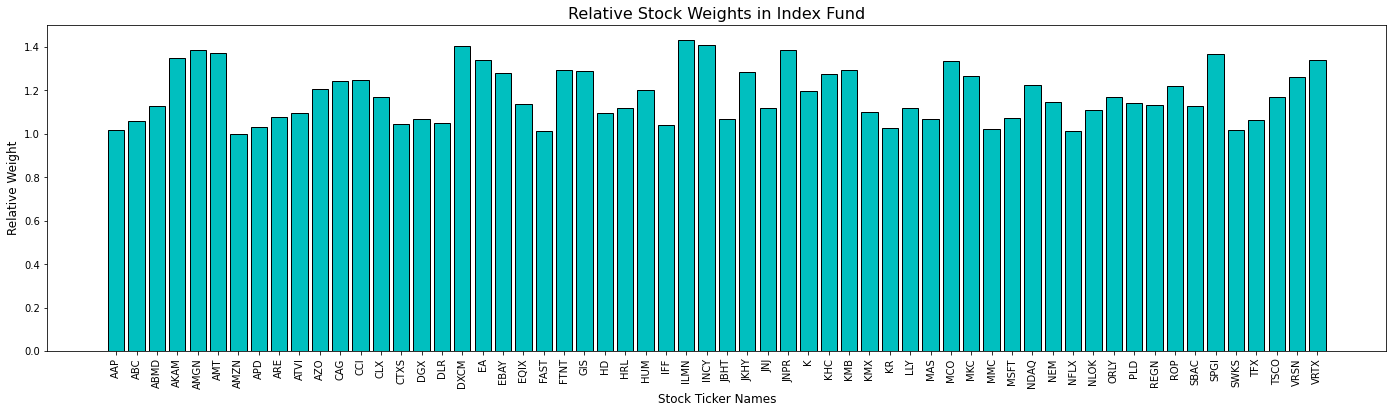

In [32]:
import matplotlib.pyplot as plt

# create figure
plt.figure(num=None, figsize=(24, 6))

plt.bar(np.arange(len(index_fund_weights)), index_fund_weights/np.max((index_fund_weights)), color = 'c', edgecolor = 'k')
plt.title("Relative Stock Weights in Index Fund", fontsize=16)
plt.xticks(np.arange(len(index_fund_weights)), index_fund_tickers, rotation=90)
plt.xlabel('Stock Ticker Names', fontsize=12)
plt.ylabel('Relative Weight', fontsize=12)
plt.show

#### Compare S&P to index fund

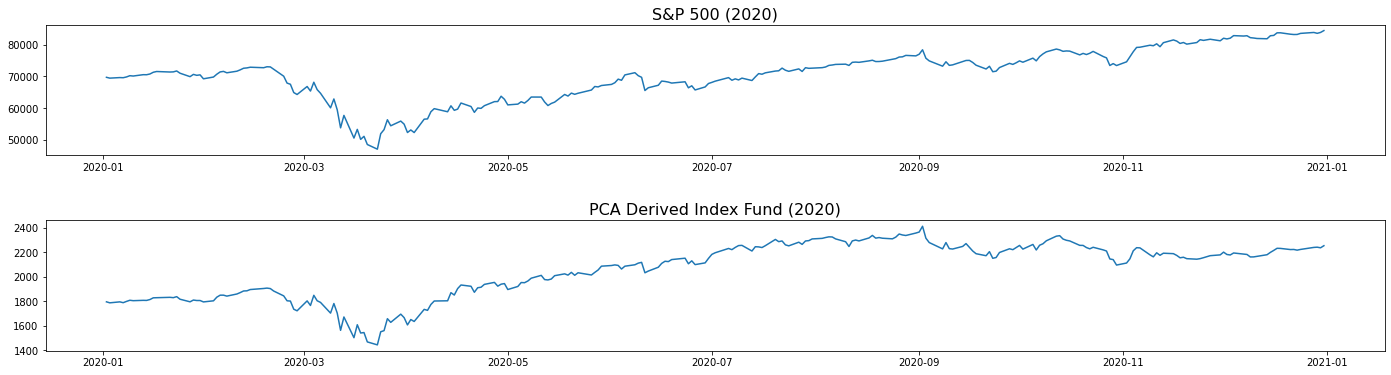

In [34]:
# create figure
plt.figure(num=None, figsize=(24, 6))

# plot S&P 500 over time
plt.subplot(2, 1, 1)
plt.plot(np.sum(df_close, axis=1))
plt.title("S&P 500 (2020)", fontsize=16)

# plot index fund over time
plt.subplot(2, 1, 2)
plt.plot(-1*np.sum(index_fund_weights * df_close.iloc[:,bool_top_stocks], axis=1))
plt.title("PCA Derived Index Fund (2020)", fontsize=16)

# add space between plots
plt.subplots_adjust(hspace = 0.5 )

#### Percent return

In [35]:
# actual percent return of S&P500 
actual_percent_return = np.sum((df_close.iloc[len(df_close)-1,:] - df_close.iloc[0,:]))/np.sum((df_close.iloc[0,:]))

print('Percent return of S&P 500:')
print(actual_percent_return)


Percent return of S&P 500:
0.21109769450249344


In [36]:
# percent return of S&P500 index fund defined by principal component 1
top_stocks_pc1_percent_return = np.sum(index_fund_weights * (df_close.iloc[len(df_close)-1,bool_top_stocks] - df_close.iloc[0,bool_top_stocks]))/np.sum(index_fund_weights * (df_close.iloc[0,bool_top_stocks]))

print('Percent return of PCA derived index fund:')
print(top_stocks_pc1_percent_return)



Percent return of PCA derived index fund:
0.25477443053003723
